# <a id="#">Task 4 – Edge detection: Derivative operators</a>

In [11]:
import numpy
import matplotlib.pyplot as plt
import skimage.io as sk

---

## Prewitt filters

**<a id="#">Task 4.1.1.</a>** Load the image `data/lena.png` and show it:

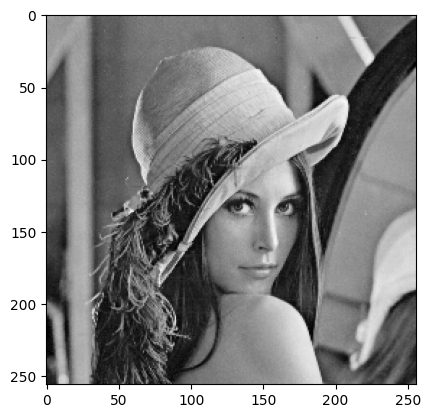

In [25]:
Lena=sk.imread("data/lena.png")
plt.imshow(Lena,"grey")

**<a id="#">Task 4.1.2.</a>** Implement horizontal and vertical $3 \times 3$ Prewitt filters:

In [87]:
def prewitt_(vimg):
    result = numpy.zeros(img.shape)
    for p in numpy.ndindex(img.shape):
        nb=0
        if 0 < p[0]-1 and p[0]+1 < img.shape[0] and 0 < p[1]-1 and p[1] + 1 < img.shape[1]:
            nb += sum(img[p[0]-1,p[1]-1:p[1]+2])
            nb -= sum(img[p[0]+1,p[1]-1:p[1]+2])
            result[p]=nb/6
        else:
            result[p]=0
    return result
    
def prewitt_h(img):
    result = numpy.zeros(img.shape)
    for p in numpy.ndindex(img.shape):
        nb=0
        if 0 < p[0]-1 and p[0]+1 < img.shape[0] and 0 < p[1]-1 and p[1] + 1 < img.shape[1]:
            nb += sum(img[p[0]-1:p[0]+2,p[1]-1])
            nb -= sum(img[p[0]-1:p[0]+2,p[1]+1])
            result[p]=nb/6
        else:
            result[p]=0
    return result

**<a id="#">Task 4.1.3.</a>** Test your above solution using the functions `prewitt_h` and `prewitt_v` for the previously loaded image and show the result:

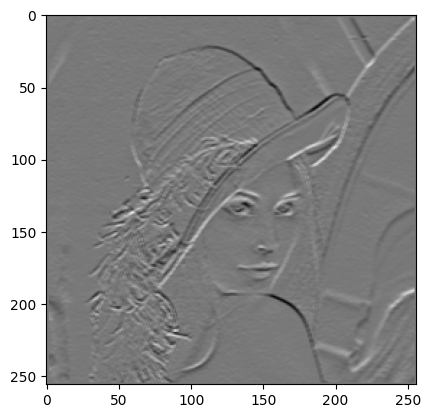

In [90]:
plt.imshow(prewitt_h(Lena),"grey")

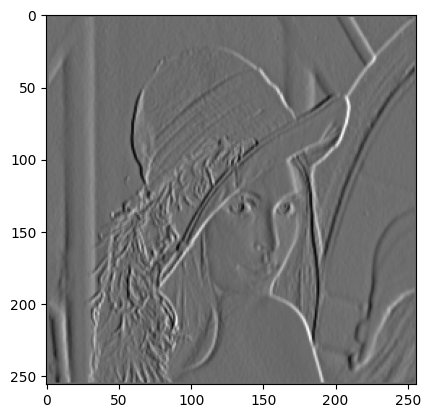

In [91]:
plt.imshow(prewitt_v(Lena),"grey")

**<a id="#">Task 4.1.4.</a>** Compare your results with the correct result image `data/lena_prewitt_h.tiff` and `data/lena_prewitt_v.tiff`:

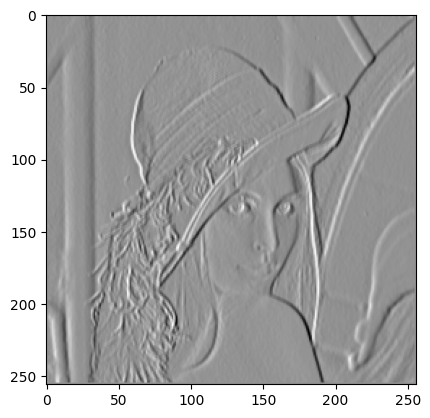

In [93]:
plt.imshow(sk.imread("data/lena_prewitt_h.tiff"),"grey")
#assert numpy.allclose(prewitt_h, sk.imread("data/lena_prewitt_h.tiff"), atol=1/255)

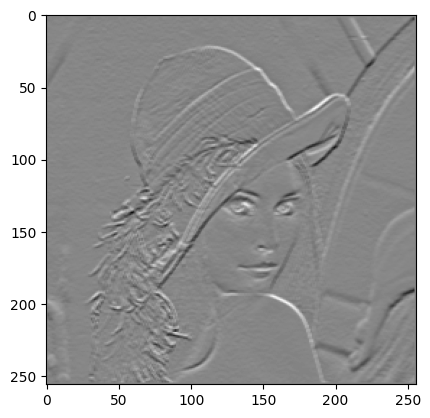

In [94]:
plt.imshow(sk.imread("data/lena_prewitt_v.tiff"),"grey")

---

## Edge detection

**<a id="#">Task 4.2.1.</a>** Use your results from **Task 4.1.2 – 4.1.3** to compute the *gradient magnitude* of the image:

In [95]:
def magnitude(img):
    gradh=prewitt_h(img)
    gradv=prewitt_v(img)
    result = numpy.zeros(img.shape)
    for p in numpy.ndindex(img.shape):
        result[p]=numpy.sqrt(gradh[p]**2+gradv[p]**2)
    return result

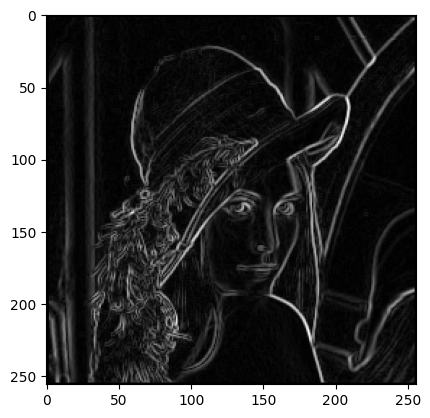

In [96]:
plt.imshow(magnitude(Lena),"grey")

**<a id="#">Task 4.2.2.</a>** Compare your result with the correct result image `data/lena_prewitt_gradmag.tiff`:

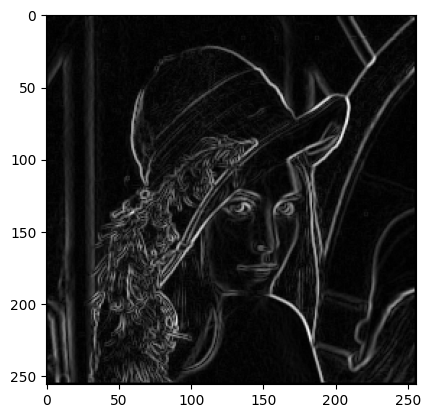

In [97]:
plt.imshow(sk.imread("data/lena_prewitt_gradmag.tiff"),"grey")

---

## Sobel filters (bonus)

**<a id="#">Task 4.3.1.</a>** Implement the two functions `sobel_h` and `sobel_v` for horizontal and vertical $3 \times 3$ Sobel filtering, respectively:

In [100]:
#def sobel_h(img):
#    result = numpy.zeros(img.shape)
 #   for p in numpy.ndindex(img.shape):
  #      nb=0
   #     if 0 < p[0]-1 and p[0]+1 < img.shape[0] and 0 < p[1]-1 and p[1] + 1 < img.shape[1]:
       #     nb+=img[p[0]-1,p[1]-1] + img[p[0]+1,p[1]-1]
    #        nb-=img[p[0]-1,p[1]+1] + img[p[0]+1,p[1]+1]
      #      nb+= 2*img[p[0],p[1]-1] + 2*img[p[0],p[1]+1]
     #       result[p]=nb/8
#        else:
 #           result[p]=0
  #  return result
#
#def sobel_v(img):
 #   result = numpy.zeros(img.shape)
  #  for p in numpy.ndindex(img.shape):
   #     nb=0
    #    if 0 < p[0]-1 and p[0]+1 < img.shape[0] and 0 < p[1]-1 and p[1] + 1 < img.shape[1]:
     #       nb+=img[p[0]-1,p[1]-1] + img[p[0]-1,p[1]+1]
      #      nb-=img[p[0]+1,p[1]-1] + img[p[0]+1,p[1]+1]
       #     nb+= 2*img[p[0]-1,p[1]] + 2*img[p[0]+1,p[1]]
 #           result[p]=nb/8
  #      else:
   #         result[p]=0
    #return result

In [109]:
def sobel_h(img):
    result = numpy.zeros(img.shape)
    maskh=numpy.array([[1,0,-1],[2,0,-2],[1,0,-1]])
    for p in numpy.ndindex(img.shape):
        if 0 < p[0]-1 and p[0]+1 < img.shape[0] and 0 < p[1]-1 and p[1] + 1 < img.shape[1]:
            nb=0
            nb+=sum(sum(img[p[0]-1:p[0]+2,p[1]-1:p[1]+2]*maskh))
            result[p]=nb/8
        else:
            result[p]=0
    return result

def sobel_v(img):
    result = numpy.zeros(img.shape)
    maskv=numpy.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    for p in numpy.ndindex(img.shape):
        if 0 < p[0]-1 and p[0]+1 < img.shape[0] and 0 < p[1]-1 and p[1] + 1 < img.shape[1]:
            nb=0
            nb+=sum(sum(img[p[0]-1:p[0]+2,p[1]-1:p[1]+2]*maskv))
            result[p]=nb/8
        else:
            result[p]=0
    return result

In [86]:
u=[100,100]
Lena[u[0]-1:u[0]+2,u[1]-1:u[1]+2]

array([[108, 121, 104],
       [ 77,  60,  66],
       [ 51,  60,  67]], dtype=uint8)

**<a id="#">Task 4.3.2.</a>** Test your above solution using the functions `sobel_h` and `sobel_v` for the previously loaded image and show the result:

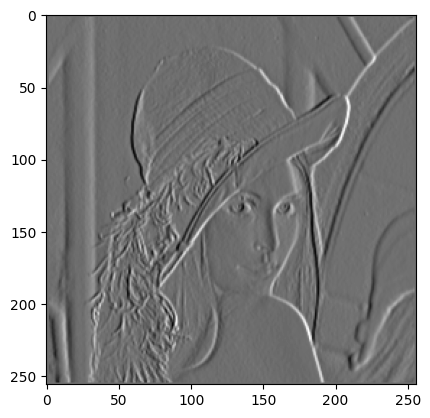

In [110]:
plt.imshow(sobel_h(Lena),"grey")

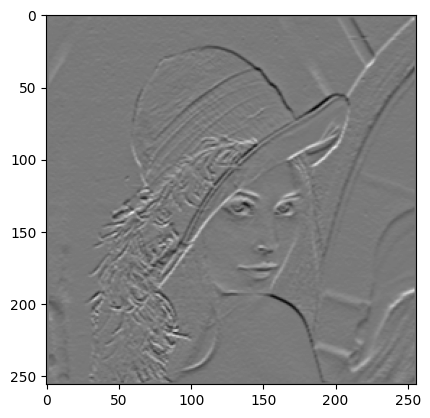

In [111]:
plt.imshow(sobel_v(Lena),"grey")

**<a id="#">Task 4.3.3.</a>** Compare your results with the correct result image `data/lena_sobel_h.tiff` and `data/lena_sobel_v.tiff`:

AssertionError: 

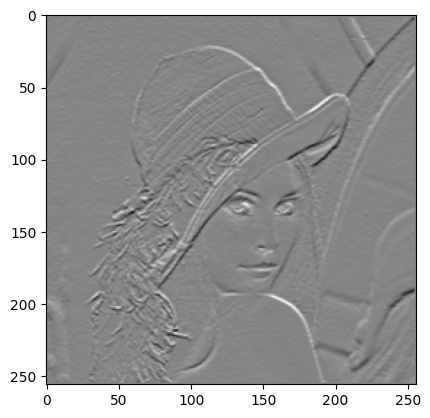

In [108]:
plt.imshow(sk.imread("data/lena_sobel_v.tiff"),"grey")
richtigv=sk.imread("data/lena_sobel_v.tiff")
assert numpy.allclose(sobel_v(Lena), richtigv, atol=1/255)